### TASK-2->Linear Regression using NEURAL NETWORK

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import SGDRegressor
import tensorflow as tf

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create a DataFrame
boston_df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
boston_df['MEDV'] = target

print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
dataset= boston_df[['CRIM',"RM","MEDV"]]
print(dataset)

        CRIM     RM  MEDV
0    0.00632  6.575  24.0
1    0.02731  6.421  21.6
2    0.02729  7.185  34.7
3    0.03237  6.998  33.4
4    0.06905  7.147  36.2
..       ...    ...   ...
501  0.06263  6.593  22.4
502  0.04527  6.120  20.6
503  0.06076  6.976  23.9
504  0.10959  6.794  22.0
505  0.04741  6.030  11.9

[506 rows x 3 columns]


In [ ]:
dataset= boston_df[['CRIM',"RM","MEDV"]].values
print(dataset)
X = np.array(dataset[:,0:2])
y = np.array(dataset[:,2])

[[6.3200e-03 6.5750e+00 2.4000e+01]
 [2.7310e-02 6.4210e+00 2.1600e+01]
 [2.7290e-02 7.1850e+00 3.4700e+01]
 ...
 [6.0760e-02 6.9760e+00 2.3900e+01]
 [1.0959e-01 6.7940e+00 2.2000e+01]
 [4.7410e-02 6.0300e+00 1.1900e+01]]


In [ ]:
#data preprocessing normalizing and splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train)

404

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scalers
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# Fit and transform the training data
X_train_normalized = x_scaler.fit_transform(X_train)
y_train_normalized = y_scaler.fit_transform(y_train.reshape(-1, 1))

# Transform the test data using the same scalers
X_test_normalized = x_scaler.transform(X_test)
y_test_normalized = y_scaler.transform(y_test.reshape(-1, 1))

X_train = X_train_normalized
y_train = y_train_normalized
X_test = X_test_normalized
y_test = y_test_normalized

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 2)
(404, 1)
(102, 2)
(102, 1)


In [ ]:
def relu(z):
    return np.maximum(0,z)

In [ ]:
def relu_derivative(z):
    return np.where(z > 0, 1, 0)

2-Hidden Layer Neural Network

In [ ]:
class NeuralNetwork2:
    def __init__(self, input_size, hidden1_size,hidden2_size,output_size,p):
        if p == 'grad':
            self.f = self.grad
        elif p == 'momentum':
            self.f = self.momentum
        else:
            self.f = self.adam


        self.v = np.array([0,0,0])
        self.m = np.array([0,0,0])
        self.t = 1
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size
        self.weights_input_hidden1 = np.random.randn(self.input_size, self.hidden1_size)
        self.weights_hidden1_hidden2 = np.random.randn(self.hidden1_size, self.hidden2_size)
        self.weights_hidden2_output = np.random.randn(self.hidden2_size, self.output_size)
        self.weights_hidden2_output = np.random.randn(self.hidden2_size, self.output_size)
        self.bias_input_hidden1 = np.zeros((1, self.hidden1_size))
        self.bias_hidden1_hidden2 = np.zeros((1, self.hidden2_size))
        self.bias_hidden2_output = np.zeros((1, self.output_size))
    def forward(self, X):
        self.hidden1 = np.dot(X, self.weights_input_hidden1) + self.bias_input_hidden1
        self.hidden1 = relu(self.hidden1)
        self.hidden2 = np.dot(self.hidden1, self.weights_hidden1_hidden2) + self.bias_hidden1_hidden2
        self.hidden2 = relu(self.hidden2)
        self.output = np.dot(self.hidden2, self.weights_hidden2_output) + self.bias_hidden2_output
        self.output = relu(self.output)


    def backward(self, X, y, learning_rate):
        size = X.shape[0]
        output_error = self.output - y
        self.hidden2_error = np.dot(output_error, self.weights_hidden2_output.T)
        self.hidden2_delta = self.hidden2_error * relu_derivative(self.hidden2)
        self.hidden1_error = np.dot(self.hidden2_delta, self.weights_hidden1_hidden2.T)
        self.hidden1_delta = self.hidden1_error * relu_derivative(self.hidden1)
        self.f(X, output_error, learning_rate)

        self.bias_hidden2_output -= learning_rate * np.mean(output_error, axis=0)
        self.bias_hidden1_hidden2 -= learning_rate * np.mean(self.hidden2_delta, axis=0)
        self.bias_input_hidden1 -= learning_rate * np.mean(self.hidden1_delta, axis=0)


        return output_error

    def grad(self,X,output_error,learning_rate):
        size = X.shape[0]
        self.weights_hidden2_output -= learning_rate * np.dot(self.hidden2.T, output_error) / size
        self.weights_hidden1_hidden2 -= learning_rate * np.dot(self.hidden1.T, self.hidden2_delta) / size
        self.weights_input_hidden1 -= learning_rate * np.dot(X.T, self.hidden1_delta) / size

    def momentum(self,X,output_error,learning_rate):
        beta = 0.9
        parameters = [self.weights_input_hidden1,self.weights_hidden1_hidden2,self.weights_hidden2_output]
        size = X.shape[0]

        grad_input_hidden1 = np.dot(X.T, self.hidden1_delta) / size
        grad_hidden1_hidden2 = np.dot(self.hidden1.T, self.hidden2_delta) / size
        grad_hidden2_output = np.dot(self.hidden2.T, output_error) / size

        # Initialize self.v as a list to hold arrays
        if isinstance(self.v, np.ndarray):
            self.v = [np.zeros_like(grad_input_hidden1),
                     np.zeros_like(grad_hidden1_hidden2),
                     np.zeros_like(grad_hidden2_output)]

        self.v[0] = beta * self.v[0] - learning_rate * grad_input_hidden1
        self.v[1] = beta * self.v[1] - learning_rate * grad_hidden1_hidden2
        self.v[2] = beta * self.v[2] - learning_rate * grad_hidden2_output

        # Update weight matrices using momentum
        self.weights_input_hidden1 += self.v[0]
        self.weights_hidden1_hidden2 += self.v[1]
        self.weights_hidden2_output += self.v[2]


    def adam(self,X,output_error,learning_rate=0.001, beta1=0.9, beta2=0.999 , epsilon=1e-8):
            size = X.shape[0]
            grads = [np.dot(X.T, self.hidden1_delta) / size,
                     np.dot(self.hidden1.T, self.hidden2_delta) / size,
                     np.dot(self.hidden2.T,output_error)/size]

            # Initialize m and v as lists to hold arrays of different shapes
            if isinstance(self.m, np.ndarray):
                self.m = [np.zeros_like(g) for g in grads]
            if isinstance(self.v, np.ndarray):
                self.v = [np.zeros_like(g) for g in grads]

            # Update moment estimates for each gradient individually
            for i in range(len(grads)):
                self.m[i] = beta1 * self.m[i] + (1 - beta1) * grads[i]
                self.v[i] = beta2 * self.v[i] + (1 - beta2) * grads[i] ** 2

            m_hat = [m / (1 - beta1 ** self.t) for m in self.m]
            v_hat = [v / (1 - beta2 ** self.t) for v in self.v]

            # Update weights
            self.weights_input_hidden1 -= learning_rate * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
            self.weights_hidden1_hidden2 -= learning_rate * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
            self.weights_hidden2_output -= learning_rate * m_hat[2] / (np.sqrt(v_hat[2]) + epsilon)

            self.t += 1


    def predict(self, X):
        self.forward(X)
        return self.output

2-Hidden Layer Neural Network with L2 REGULARIZATION

In [ ]:
class NeuralNetwork2_1:
    def __init__(self, input_size, hidden1_size,hidden2_size,output_size,p):
        if p == 'grad':
            self.f = self.grad
        elif p == 'momentum':
            self.f = self.momentum
        else:
            self.f = self.adam


        self.v = np.array([0,0,0])
        self.m = np.array([0,0,0])
        self.t = 1
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size
        self.weights_input_hidden1 = np.random.randn(self.input_size, self.hidden1_size)
        self.weights_hidden1_hidden2 = np.random.randn(self.hidden1_size, self.hidden2_size)
        self.weights_hidden2_output = np.random.randn(self.hidden2_size, self.output_size)
        self.weights_hidden2_output = np.random.randn(self.hidden2_size, self.output_size)
        self.bias_input_hidden1 = np.zeros((1, self.hidden1_size))
        self.bias_hidden1_hidden2 = np.zeros((1, self.hidden2_size))
        self.bias_hidden2_output = np.zeros((1, self.output_size))
    def forward(self, X):
        self.hidden1 = np.dot(X, self.weights_input_hidden1) + self.bias_input_hidden1
        self.hidden1 = relu(self.hidden1)
        self.hidden2 = np.dot(self.hidden1, self.weights_hidden1_hidden2) + self.bias_hidden1_hidden2
        self.hidden2 = relu(self.hidden2)
        self.output = np.dot(self.hidden2, self.weights_hidden2_output) + self.bias_hidden2_output
        self.output = relu(self.output)


    def backward(self, X, y, learning_rate,lambda_):
        size = X.shape[0]
        output_error = self.output - y
        self.hidden2_error = np.dot(output_error, self.weights_hidden2_output.T)
        self.hidden2_delta = self.hidden2_error * relu_derivative(self.hidden2)
        self.hidden1_error = np.dot(self.hidden2_delta, self.weights_hidden1_hidden2.T)
        self.hidden1_delta = self.hidden1_error * relu_derivative(self.hidden1)
        self.f(X, output_error, learning_rate,lambda_)
        self.bias_hidden2_output -= learning_rate * np.mean(output_error, axis=0)
        self.bias_hidden1_hidden2 -= learning_rate * np.mean(self.hidden2_delta, axis=0)
        self.bias_input_hidden1 -= learning_rate * np.mean(self.hidden1_delta, axis=0)


        return output_error

    def grad(self,X,output_error,learning_rate,lambda_):
        size = X.shape[0]
        self.weights_hidden2_output -= learning_rate * (np.dot(self.hidden2.T, output_error) / size + lambda_*self.weights_hidden2_output)
        self.weights_hidden1_hidden2 -= learning_rate * (np.dot(self.hidden1.T, self.hidden2_delta) / size + lambda_*self.weights_hidden1_hidden2)
        self.weights_input_hidden1 -= learning_rate * (np.dot(X.T, self.hidden1_delta) / size + lambda_*self.weights_input_hidden1)

    def momentum(self,X,output_error,learning_rate,weight_decay = 0.01):
        beta = 0.9
        parameters = [self.weights_input_hidden1,self.weights_hidden1_hidden2,self.weights_hidden2_output]
        size = X.shape[0]

        grad_input_hidden1 = np.dot(X.T, self.hidden1_delta) / size
        grad_hidden1_hidden2 = np.dot(self.hidden1.T, self.hidden2_delta) / size
        grad_hidden2_output = np.dot(self.hidden2.T, output_error) / size

        # Initialize self.v as a list to hold arrays
        if isinstance(self.v, np.ndarray):
            self.v = [np.zeros_like(grad_input_hidden1),
                     np.zeros_like(grad_hidden1_hidden2),
                     np.zeros_like(grad_hidden2_output)]

        self.v[0] = beta * self.v[0] - learning_rate * grad_input_hidden1
        self.v[1] = beta * self.v[1] - learning_rate * grad_hidden1_hidden2
        self.v[2] = beta * self.v[2] - learning_rate * grad_hidden2_output

        # Update weight matrices using momentum
        self.weights_input_hidden1 += self.v[0]
        self.weights_hidden1_hidden2 += self.v[1]
        self.weights_hidden2_output += self.v[2]

        # Apply weight decay directly to weights
        self.weights_input_hidden1  *= (1 - learning_rate * weight_decay)
        self.weights_hidden1_hidden2 *= (1 - learning_rate * weight_decay)
        self.weights_hidden2_output *= (1 - learning_rate * weight_decay)


    def adam(self,X,output_error,learning_rate=0.001, beta1=0.9, beta2=0.999 , epsilon=1e-8,weight_decay=0.01):
            size = X.shape[0]
            grads = [np.dot(X.T, self.hidden1_delta) / size,
                     np.dot(self.hidden1.T, self.hidden2_delta) / size,
                     np.dot(self.hidden2.T,output_error)/size]

            # Initialize m and v as lists to hold arrays of different shapes
            if isinstance(self.m, np.ndarray):
                self.m = [np.zeros_like(g) for g in grads]
            if isinstance(self.v, np.ndarray):
                self.v = [np.zeros_like(g) for g in grads]

            # Update moment estimates for each gradient individually
            for i in range(len(grads)):
                self.m[i] = beta1 * self.m[i] + (1 - beta1) * grads[i]
                self.v[i] = beta2 * self.v[i] + (1 - beta2) * grads[i] ** 2

            m_hat = [m / (1 - beta1 ** self.t) for m in self.m]
            v_hat = [v / (1 - beta2 ** self.t) for v in self.v]

            # Update weights
            self.weights_input_hidden1 -= learning_rate * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
            self.weights_hidden1_hidden2 -= learning_rate * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
            self.weights_hidden2_output -= learning_rate * m_hat[2] / (np.sqrt(v_hat[2]) + epsilon)

            self.t += 1

            # Apply weight decay directly to weights
            self.weights_input_hidden1  *= (1 - learning_rate * weight_decay)
            self.weights_hidden1_hidden2 *= (1 - learning_rate * weight_decay)
            self.weights_hidden2_output *= (1 - learning_rate * weight_decay)

    def predict(self, X):
        self.forward(X)
        return self.output

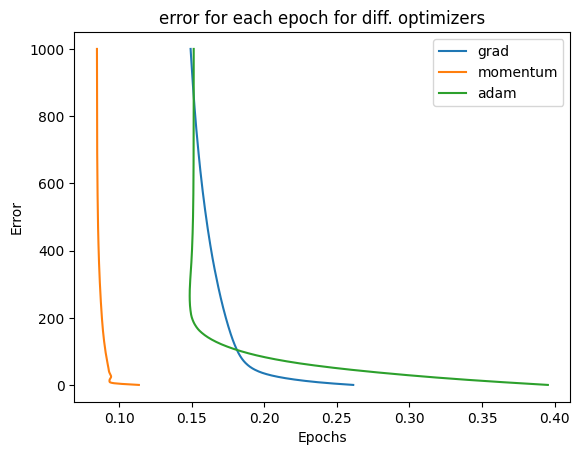

In [ ]:
#training  and testing for learning rate 0.01
labels = ['grad','momentum','adam']
epoch = range(1,1001)
least_mse = 1000
least_label =""
for j,label in enumerate(labels):
    NN = NeuralNetwork2(input_size=2, hidden1_size=5,hidden2_size=3, output_size=1,p = label)
    error = []
    for i in range(1000):
        NN.forward(X_train)

        output_error = NN.backward(X_train, y_train, learning_rate=0.01)
        error.append(np.mean(np.abs(output_error)))
    res = NN.predict(X_test)
    MSE = np.sqrt(np.mean((res - y_test) ** 2))
    if MSE < least_mse:
        least_mse = MSE
        least_label = label
    plt.plot(error,epoch,label = label)
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Error")
plt.title("error for each epoch for diff. optimizers")
plt.show()

In [ ]:
print("least MSE : ")
print(least_mse)
print("best optimizer : ")
print(least_label)

least MSE : 
0.12937432901547802
best optimizer : 
momentum


testing the l2 regularization for the best label and least mse

In [ ]:
test1 = NeuralNetwork2_1(input_size=2, hidden1_size=5,hidden2_size=3,output_size=1,p = least_label)
test1.forward(X_train)
output_error = test1.backward(X_train, y_train, learning_rate=0.01,lambda_=0.01)
l2_weights_norm = np.linalg.norm(test1.weights_input_hidden1)
print("l2_weights_norm:")
print(l2_weights_norm)
test2 = NeuralNetwork2(input_size=2, hidden1_size=5,hidden2_size=3,output_size=1,p = least_label)
test2.forward(X_train)
output_error = test2.backward(X_train, y_train, learning_rate=0.01)
no_l2_weights_norm = np.linalg.norm(test2.weights_input_hidden1)
print("no_l2_weights_norm:")
print(no_l2_weights_norm)

l2_weights_norm:
2.221041719362311
no_l2_weights_norm:
3.361665831563352


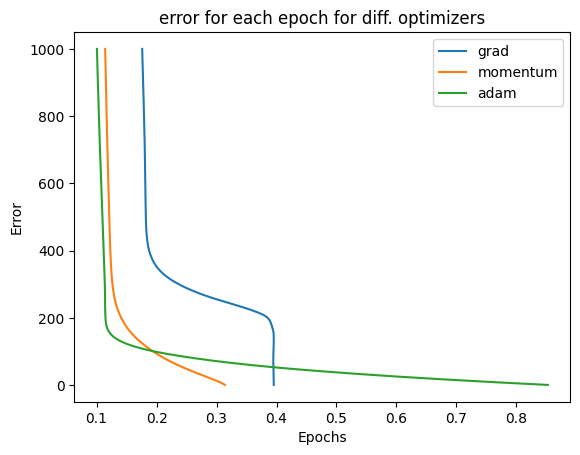

In [ ]:
#training  and testing for learning rate 0.001
labels = ['grad','momentum','adam']
epoch = range(1,1001)
least_mse = 1000
least_label =""
for j,label in enumerate(labels):
    NN = NeuralNetwork2(input_size=2, hidden1_size=5,hidden2_size=3, output_size=1,p = label)
    error = []
    for i in range(1000):
        NN.forward(X_train)

        output_error = NN.backward(X_train, y_train, learning_rate=0.001)
        error.append(np.mean(np.abs(output_error)))
    res = NN.predict(X_test)
    MSE = np.sqrt(np.mean((res - y_test) ** 2))
    if MSE < least_mse:
        least_mse = MSE
        least_label = label
    plt.plot(error,epoch,label = label)
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Error")
plt.title("error for each epoch for diff. optimizers")
plt.show()

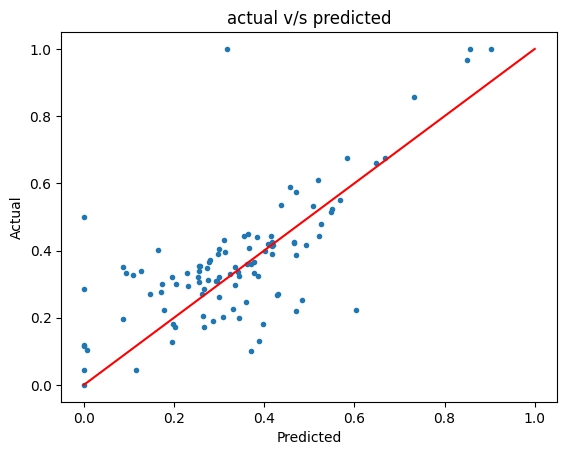

In [ ]:
plt.plot(res,y_test,'.')
plt.plot([0,1],[0,1],color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("actual v/s predicted")
plt.show()

In [ ]:
print("least MSE : ")
print(least_mse)
print("best optimizer : ")
print(least_label)

least MSE : 
0.14226654194349572
best optimizer : 
adam


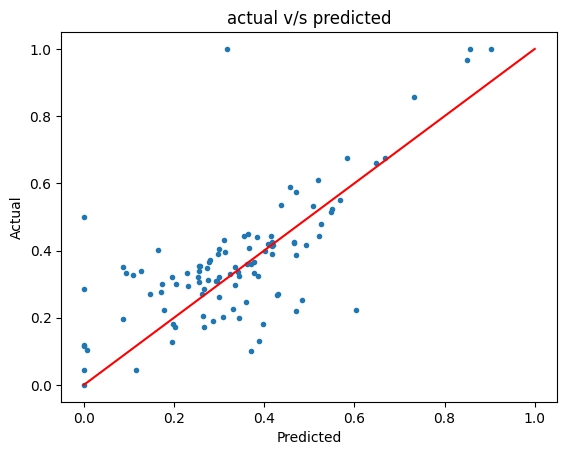

In [ ]:
plt.plot(res,y_test,'.')
plt.plot([0,1],[0,1],color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("actual v/s predicted")
plt.show()

testing the l2 regularization for the best label and least mse

In [ ]:
test1 = NeuralNetwork2_1(input_size=2, hidden1_size=5,hidden2_size=3,output_size=1,p = least_label)
test1.forward(X_train)
output_error = test1.backward(X_train, y_train, learning_rate=0.001,lambda_=0.01)
l2_weights_norm = np.linalg.norm(test1.weights_input_hidden1)
print("l2_weights_norm:")
print(l2_weights_norm)
test2 = NeuralNetwork2(input_size=2, hidden1_size=5,hidden2_size=3,output_size=1,p = least_label)
test2.forward(X_train)
output_error = test2.backward(X_train, y_train, learning_rate=0.001)
no_l2_weights_norm = np.linalg.norm(test2.weights_input_hidden1)
print("no_l2_weights_norm:")
print(no_l2_weights_norm)

l2_weights_norm:
1.9466962946781117
no_l2_weights_norm:
2.9339721900127094


3-Hidden layer Neural Network

In [ ]:
class NeuralNetwork3:
    def __init__(self, input_size, hidden1_size,hidden2_size,hidden3_size, output_size,p):
        if p == 'grad':
            self.f = self.grad
        elif p == 'momentum':
            self.f = self.momentum
        else:
            self.f = self.adam


        self.v = np.array([0,0,0])
        self.m = np.array([0,0,0])
        self.t = 1
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.hidden3_size = hidden3_size
        self.output_size = output_size
        self.weights_input_hidden1 = np.random.randn(self.input_size, self.hidden1_size)
        self.weights_hidden1_hidden2 = np.random.randn(self.hidden1_size, self.hidden2_size)
        self.weights_hidden2_output = np.random.randn(self.hidden2_size, self.output_size)
        self.weights_hidden2_hidden3 = np.random.randn(self.hidden2_size, self.hidden3_size)
        self.weights_hidden3_output = np.random.randn(self.hidden3_size, self.output_size)
        self.bias_input_hidden1 = np.zeros((1, self.hidden1_size))
        self.bias_hidden1_hidden2 = np.zeros((1, self.hidden2_size))
        self.bias_hidden2_hidden3 = np.zeros((1, self.hidden3_size))
        self.bias_hidden3_output = np.zeros((1, self.output_size))
    def forward(self, X):
        self.hidden1 = np.dot(X, self.weights_input_hidden1) + self.bias_input_hidden1
        self.hidden1 = relu(self.hidden1)
        self.hidden2 = np.dot(self.hidden1, self.weights_hidden1_hidden2) + self.bias_hidden1_hidden2
        self.hidden2 = relu(self.hidden2)
        self.hidden3 = np.dot(self.hidden2, self.weights_hidden2_hidden3) + self.bias_hidden2_hidden3
        self.hidden3 = relu(self.hidden3)
        self.output = np.dot(self.hidden3, self.weights_hidden3_output) + self.bias_hidden3_output
        self.output = relu(self.output)

    def backward(self, X, y, learning_rate):
        size = X.shape[0]
        output_error = self.output - y
        self.hidden3_error = np.dot(output_error, self.weights_hidden3_output.T)
        self.hidden3_delta = self.hidden3_error * relu_derivative(self.hidden3)
        self.hidden2_error = np.dot(self.hidden3_delta, self.weights_hidden2_hidden3.T)
        self.hidden2_delta = self.hidden2_error * relu_derivative(self.hidden2)
        self.hidden1_error = np.dot(self.hidden2_delta, self.weights_hidden1_hidden2.T)
        self.hidden1_delta = self.hidden1_error * relu_derivative(self.hidden1)
        self.f(X, output_error, learning_rate)

        self.bias_hidden3_output -= learning_rate * np.mean(output_error, axis=0)
        self.bias_hidden2_hidden3 -= learning_rate * np.mean(self.hidden3_delta, axis=0)
        self.bias_hidden1_hidden2 -= learning_rate * np.mean(self.hidden2_delta, axis=0)
        self.bias_input_hidden1 -= learning_rate * np.mean(self.hidden1_delta, axis=0)


        return output_error

    def grad(self,X,output_error,learning_rate):
        size = X.shape[0]
        self.weights_hidden3_output -= learning_rate * np.dot(self.hidden3.T, output_error) / size
        self.weights_hidden2_hidden3 -= learning_rate * np.dot(self.hidden2.T, self.hidden3_delta) / size
        self.weights_hidden1_hidden2 -= learning_rate * np.dot(self.hidden1.T, self.hidden2_delta) / size
        self.weights_input_hidden1 -= learning_rate * np.dot(X.T, self.hidden1_delta) / size

    def momentum(self,X,output_error,learning_rate):
        beta = 0.9
        parameters = [self.weights_input_hidden1,self.weights_hidden1_hidden2,self.weights_hidden2_hidden3,self.weights_hidden3_output]
        size = X.shape[0]

        grad_input_hidden1 = np.dot(X.T, self.hidden1_delta) / size
        grad_hidden1_hidden2 = np.dot(self.hidden1.T, self.hidden2_delta) / size
        grad_hidden2_hidden3 = np.dot(self.hidden2.T, self.hidden3_delta) / size
        grad_hidden3_output = np.dot(self.hidden3.T, output_error) / size

        # Initialize self.v as a list to hold arrays
        if isinstance(self.v, np.ndarray):
            self.v = [np.zeros_like(grad_input_hidden1),
                     np.zeros_like(grad_hidden1_hidden2),
                     np.zeros_like(grad_hidden2_hidden3),
                     np.zeros_like(grad_hidden3_output)]

        self.v[0] = beta * self.v[0] - learning_rate * grad_input_hidden1
        self.v[1] = beta * self.v[1] - learning_rate * grad_hidden1_hidden2
        self.v[2] = beta * self.v[2] - learning_rate * grad_hidden2_hidden3
        self.v[3] = beta * self.v[3] - learning_rate * grad_hidden3_output

        # Update weight matrices using momentum
        self.weights_input_hidden1 += self.v[0]
        self.weights_hidden1_hidden2 += self.v[1]
        self.weights_hidden2_hidden3 += self.v[2]
        self.weights_hidden3_output += self.v[3]


    def adam(self,X,output_error,learning_rate=0.001, beta1=0.9, beta2=0.999 , beta3 = 0.9999, epsilon=1e-8):
            size = X.shape[0]
            grads = [np.dot(X.T, self.hidden1_delta) / size,
                     np.dot(self.hidden1.T, self.hidden2_delta) / size,
                     np.dot(self.hidden2.T, self.hidden3_delta) / size,
                     np.dot(self.hidden3.T,output_error)/size]

            # Initialize m and v as lists to hold arrays of different shapes
            if isinstance(self.m, np.ndarray):
                self.m = [np.zeros_like(g) for g in grads]
            if isinstance(self.v, np.ndarray):
                self.v = [np.zeros_like(g) for g in grads]

            # Update moment estimates for each gradient individually
            for i in range(len(grads)):
                self.m[i] = beta1 * self.m[i] + (1 - beta1) * grads[i]
                self.v[i] = beta2 * self.v[i] + (1 - beta2) * grads[i] ** 2

            m_hat = [m / (1 - beta1 ** self.t) for m in self.m]
            v_hat = [v / (1 - beta2 ** self.t) for v in self.v]

            # Update weights
            self.weights_input_hidden1 -= learning_rate * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
            self.weights_hidden1_hidden2 -= learning_rate * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
            self.weights_hidden2_hidden3 -= learning_rate * m_hat[2] / (np.sqrt(v_hat[2]) + epsilon)
            self.weights_hidden3_output -= learning_rate * m_hat[3] / (np.sqrt(v_hat[3]) + epsilon)

            self.t += 1


    def predict(self, X):
        self.forward(X)
        return self.output

3-hidden layer Neural Network with L2 Regularization

In [ ]:
class NeuralNetwork3_1:
    def __init__(self, input_size, hidden1_size,hidden2_size,hidden3_size, output_size,p):
        if p == 'grad':
            self.f = self.grad
        elif p == 'momentum':
            self.f = self.momentum
        else:
            self.f = self.adam


        self.v = np.array([0,0,0])
        self.m = np.array([0,0,0])
        self.t = 1
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.hidden3_size = hidden3_size
        self.output_size = output_size
        self.weights_input_hidden1 = np.random.randn(self.input_size, self.hidden1_size)
        self.weights_hidden1_hidden2 = np.random.randn(self.hidden1_size, self.hidden2_size)
        self.weights_hidden2_output = np.random.randn(self.hidden2_size, self.output_size)
        self.weights_hidden2_hidden3 = np.random.randn(self.hidden2_size, self.hidden3_size)
        self.weights_hidden3_output = np.random.randn(self.hidden3_size, self.output_size)
        self.bias_input_hidden1 = np.zeros((1, self.hidden1_size))
        self.bias_hidden1_hidden2 = np.zeros((1, self.hidden2_size))
        self.bias_hidden2_hidden3 = np.zeros((1, self.hidden3_size))
        self.bias_hidden3_output = np.zeros((1, self.output_size))
    def forward(self, X):
        self.hidden1 = np.dot(X, self.weights_input_hidden1) + self.bias_input_hidden1
        self.hidden1 = relu(self.hidden1)
        self.hidden2 = np.dot(self.hidden1, self.weights_hidden1_hidden2) + self.bias_hidden1_hidden2
        self.hidden2 = relu(self.hidden2)
        self.hidden3 = np.dot(self.hidden2, self.weights_hidden2_hidden3) + self.bias_hidden2_hidden3
        self.hidden3 = relu(self.hidden3)
        self.output = np.dot(self.hidden3, self.weights_hidden3_output) + self.bias_hidden3_output
        self.output = relu(self.output)

    def backward(self, X, y, learning_rate,lambda_):
        size = X.shape[0]
        output_error = self.output - y
        self.hidden3_error = np.dot(output_error, self.weights_hidden3_output.T)
        self.hidden3_delta = self.hidden3_error * relu_derivative(self.hidden3)
        self.hidden2_error = np.dot(self.hidden3_delta, self.weights_hidden2_hidden3.T)
        self.hidden2_delta = self.hidden2_error * relu_derivative(self.hidden2)
        self.hidden1_error = np.dot(self.hidden2_delta, self.weights_hidden1_hidden2.T)
        self.hidden1_delta = self.hidden1_error * relu_derivative(self.hidden1)
        self.f(X, output_error, learning_rate, lambda_)

        self.bias_hidden3_output -= learning_rate * np.mean(output_error, axis=0)
        self.bias_hidden2_hidden3 -= learning_rate * np.mean(self.hidden3_delta, axis=0)
        self.bias_hidden1_hidden2 -= learning_rate * np.mean(self.hidden2_delta, axis=0)
        self.bias_input_hidden1 -= learning_rate * np.mean(self.hidden1_delta, axis=0)


        return output_error

    def grad(self,X,output_error,learning_rate, lambda_):
        size = X.shape[0]
        self.weights_hidden3_output -= learning_rate * (np.dot(self.hidden3.T, output_error) / size + lambda_ * self.weights_hidden3_output)
        self.weights_hidden2_hidden3 -= learning_rate * (np.dot(self.hidden2.T, self.hidden3_delta) / size + lambda_ * self.weights_hidden2_hidden3)
        self.weights_hidden1_hidden2 -= learning_rate * (np.dot(self.hidden1.T, self.hidden2_delta) / size + lambda_ * self.weights_hidden1_hidden2)
        self.weights_input_hidden1 -= learning_rate * (np.dot(X.T, self.hidden1_delta) / size + lambda_ * self.weights_input_hidden1)

    def momentum(self, X, output_error, learning_rate, weight_decay=0.01):
        beta = 0.9
        parameters = [self.weights_input_hidden1, self.weights_hidden1_hidden2, self.weights_hidden2_hidden3, self.weights_hidden3_output]
        size = X.shape[0]

        grad_input_hidden1 = np.dot(X.T, self.hidden1_delta) / size
        grad_hidden1_hidden2 = np.dot(self.hidden1.T, self.hidden2_delta) / size
        grad_hidden2_hidden3 = np.dot(self.hidden2.T, self.hidden3_delta) / size
        grad_hidden3_output = np.dot(self.hidden3.T, output_error) / size

        # Initialize self.v as a list to hold arrays
        if isinstance(self.v, np.ndarray):
            self.v = [np.zeros_like(grad_input_hidden1),
                     np.zeros_like(grad_hidden1_hidden2),
                     np.zeros_like(grad_hidden2_hidden3),
                     np.zeros_like(grad_hidden3_output)]

        self.v[0] = beta * self.v[0] - learning_rate * grad_input_hidden1
        self.v[1] = beta * self.v[1] - learning_rate * grad_hidden1_hidden2
        self.v[2] = beta * self.v[2] - learning_rate * grad_hidden2_hidden3
        self.v[3] = beta * self.v[3] - learning_rate * grad_hidden3_output

        # Update weight matrices using momentum
        self.weights_input_hidden1 += self.v[0]
        self.weights_hidden1_hidden2 += self.v[1]
        self.weights_hidden2_hidden3 += self.v[2]
        self.weights_hidden3_output += self.v[3]

        # Apply weight decay directly to weights
        self.weights_input_hidden1  *= (1 - learning_rate * weight_decay)
        self.weights_hidden1_hidden2 *= (1 - learning_rate * weight_decay)
        self.weights_hidden2_hidden3 *= (1 - learning_rate * weight_decay)
        self.weights_hidden3_output *= (1 - learning_rate * weight_decay)


    def adam(self, X, output_error, learning_rate=0.001, beta1=0.9, beta2=0.999, beta3=0.9999, epsilon=1e-8, weight_decay=0.01):
        size = X.shape[0]
        grads = [np.dot(X.T, self.hidden1_delta) / size,
                 np.dot(self.hidden1.T, self.hidden2_delta) / size,
                 np.dot(self.hidden2.T, self.hidden3_delta) / size,
                 np.dot(self.hidden3.T, output_error) / size]

        # Initialize m and v as lists to hold arrays of different shapes
        if isinstance(self.m, np.ndarray):
            self.m = [np.zeros_like(g) for g in grads]
        if isinstance(self.v, np.ndarray):
            self.v = [np.zeros_like(g) for g in grads]

        # Update moment estimates for each gradient individually
        for i in range(len(grads)):
            self.m[i] = beta1 * self.m[i] + (1 - beta1) * grads[i]
            self.v[i] = beta2 * self.v[i] + (1 - beta2) * grads[i] ** 2

        m_hat = [m / (1 - beta1 ** self.t) for m in self.m]
        v_hat = [v / (1 - beta2 ** self.t) for v in self.v]

        # Update weights
        self.weights_input_hidden1 -= learning_rate * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
        self.weights_hidden1_hidden2 -= learning_rate * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
        self.weights_hidden2_hidden3 -= learning_rate * m_hat[2] / (np.sqrt(v_hat[2]) + epsilon)
        self.weights_hidden3_output -= learning_rate * m_hat[3] / (np.sqrt(v_hat[3]) + epsilon)

        self.t += 1

        # Apply weight decay directly to weights
        self.weights_input_hidden1  *= (1 - learning_rate * weight_decay)
        self.weights_hidden1_hidden2 *= (1 - learning_rate * weight_decay)
        self.weights_hidden2_hidden3 *= (1 - learning_rate * weight_decay)
        self.weights_hidden3_output *= (1 - learning_rate * weight_decay)

    def predict(self, X):
        self.forward(X)
        return self.output

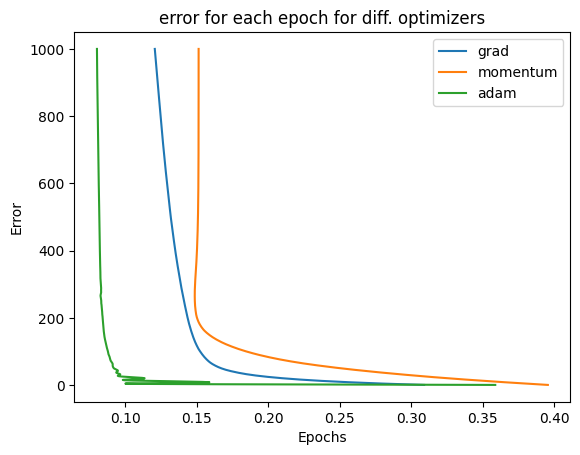

In [ ]:
#training  and testing for learning rate 0.01
labels = ['grad','momentum','adam']
epoch = range(1,1001)
least_mse = 1000
least_label =""
for j,label in enumerate(labels):
    NN = NeuralNetwork3(input_size=2, hidden1_size=5,hidden2_size=3,hidden3_size=2, output_size=1,p = label)
    error = []
    for i in range(1000):
        NN.forward(X_train)

        output_error = NN.backward(X_train, y_train, learning_rate=0.01)
        error.append(np.mean(np.abs(output_error)))
    res = NN.predict(X_test)
    MSE = np.sqrt(np.mean((res - y_test) ** 2))
    if MSE < least_mse:
        least_mse = MSE
        least_label = label
    plt.plot(error,epoch,label = label)
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Error")
plt.title("error for each epoch for diff. optimizers")
plt.show()

In [ ]:
print("least MSE:")
print(least_mse)
print("best optimizer : ")
print(least_label)

least MSE:
0.12447705613829237
best optimizer : 
adam


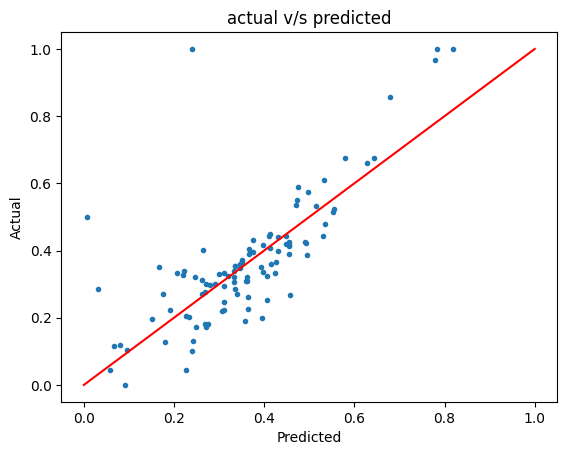

In [ ]:
plt.plot(res,y_test,'.')
plt.plot([0,1],[0,1],color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("actual v/s predicted")
plt.show()

testing the l2 optimizer

In [ ]:
test1 = NeuralNetwork3_1(input_size=2, hidden1_size=5,hidden2_size=3,hidden3_size=2, output_size=1,p = least_label)
test1.forward(X_train)
output_error = test1.backward(X_train, y_train, learning_rate=0.001,lambda_=0.01)
l2_weights_norm = np.linalg.norm(test1.weights_input_hidden1)
print("l2_weights_norm:")
print(l2_weights_norm)
test2 = NeuralNetwork3(input_size=2, hidden1_size=5,hidden2_size=3,hidden3_size=2, output_size=1,p = least_label)
test2.forward(X_train)
output_error = test2.backward(X_train, y_train, learning_rate=0.01)
no_l2_weights_norm = np.linalg.norm(test2.weights_input_hidden1)
print("no_l2_weights_norm:")
print(no_l2_weights_norm)

l2_weights_norm:
2.968865431150278
no_l2_weights_norm:
3.182593722396319


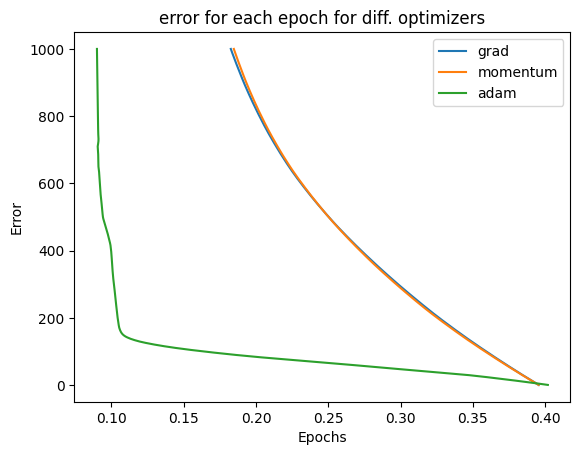

In [ ]:
#training  and testing for learning rate 0.001
labels = ['grad','momentum','adam']
epoch = range(1,1001)
least_mse = 1000
least_label =""
for j,label in enumerate(labels):
    NN = NeuralNetwork3(input_size=2, hidden1_size=5,hidden2_size=3,hidden3_size=2, output_size=1,p = label)
    error = []
    for i in range(1000):
        NN.forward(X_train)

        output_error = NN.backward(X_train, y_train, learning_rate=0.001)
        error.append(np.mean(np.abs(output_error)))
    res = NN.predict(X_test)
    MSE = np.sqrt(np.mean((res - y_test) ** 2))
    if MSE < least_mse:
        least_mse = MSE
        least_label = label
    plt.plot(error,epoch,label = label)
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Error")
plt.title("error for each epoch for diff. optimizers")
plt.show()

In [ ]:
print("least MSE:")
print(least_mse)
print("best optimizer : ")
print(least_label)

least MSE:
0.13329737039554293
best optimizer : 
adam


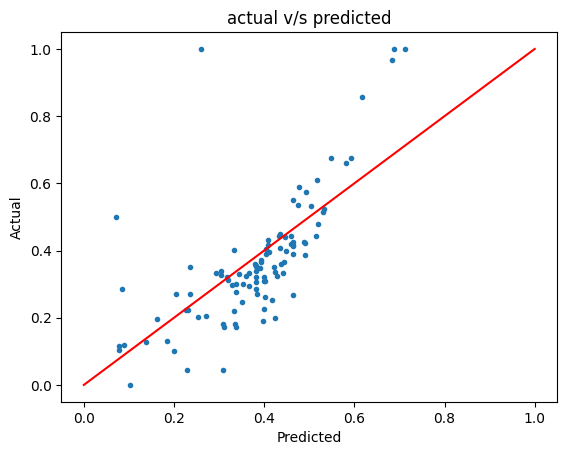

In [ ]:
plt.plot(res,y_test,'.')
plt.plot([0,1],[0,1],color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("actual v/s predicted")
plt.show()

testing the l2 regularization

In [ ]:
test1 = NeuralNetwork3_1(input_size=2, hidden1_size=5,hidden2_size=3,hidden3_size=2, output_size=1,p = least_label)
test1.forward(X_train)
output_error = test1.backward(X_train, y_train, learning_rate=0.001,lambda_=0.01)
l2_weights_norm = np.linalg.norm(test1.weights_input_hidden1)
print("l2_weights_norm:")
print(l2_weights_norm)
test2 = NeuralNetwork3(input_size=2, hidden1_size=5,hidden2_size=3,hidden3_size=2, output_size=1,p = least_label)
test2.forward(X_train)
output_error = test2.backward(X_train, y_train, learning_rate=0.001)
no_l2_weights_norm = np.linalg.norm(test2.weights_input_hidden1)
print("no_l2_weights_norm:")
print(no_l2_weights_norm)

l2_weights_norm:
3.7494357694272518
no_l2_weights_norm:
2.640018746048583
